In [1]:
import scipy.io as sio
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
signal1 = sio.loadmat("131 rem1.mat")

In [3]:
#исходный сигнал

In [4]:
signal = asarray(signal1["eeg4"][0])

In [5]:
len(signal)

4489

In [6]:
def s(t):
    return signal[t]

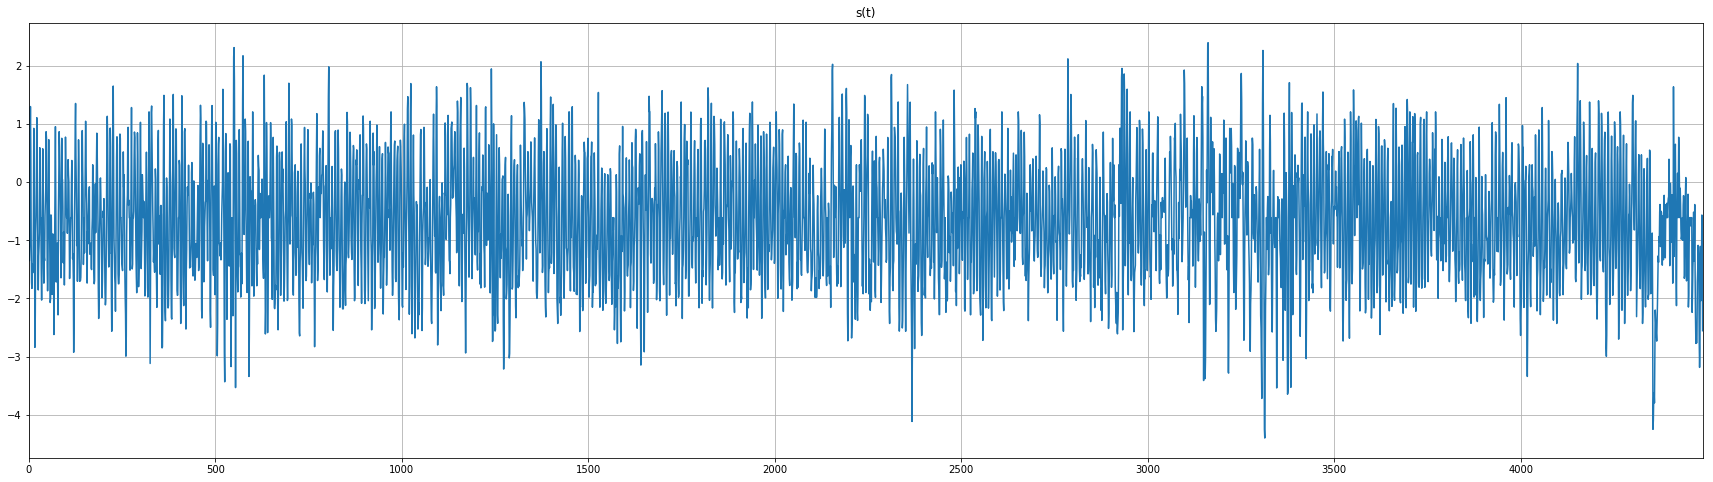

In [7]:
time = arange(len(signal))
fig = plt.figure(figsize=(30,8))
plt.plot(time, s(time))
plt.title("s(t)")
plt.xlim([0,len(signal)])
plt.grid(True)
plt.show()

In [8]:
def MHAT(t):
    expr = (1 - t ** 2) * exp(-t ** 2 / 2)
    return expr

In [9]:
tt = linspace(-10,10, 1000)

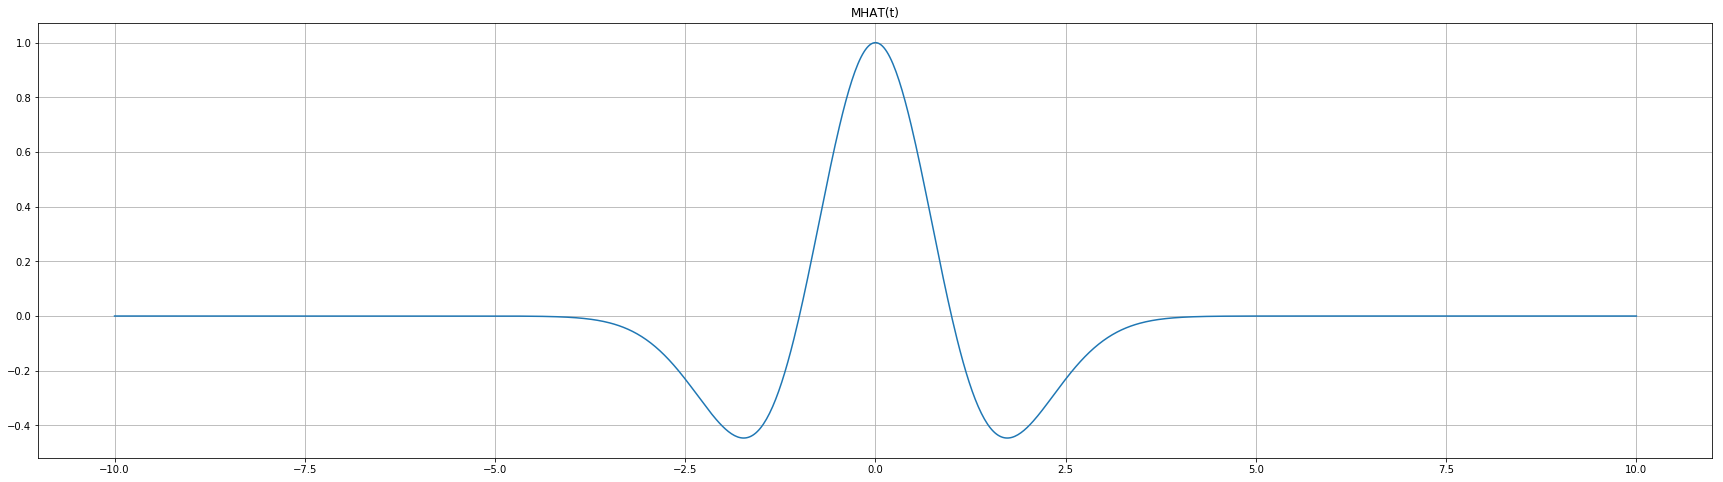

In [10]:
fig2 = plt.figure(figsize=(30,8))
plt.plot(tt, MHAT(tt))
plt.title("MHAT(t)")
plt.grid(True)
plt.show()

In [11]:
def psi_base(a, b, t):
    expr = (1 / sqrt(a)) * MHAT((t - b) / a)
    return expr

<IPython.core.display.Javascript object>


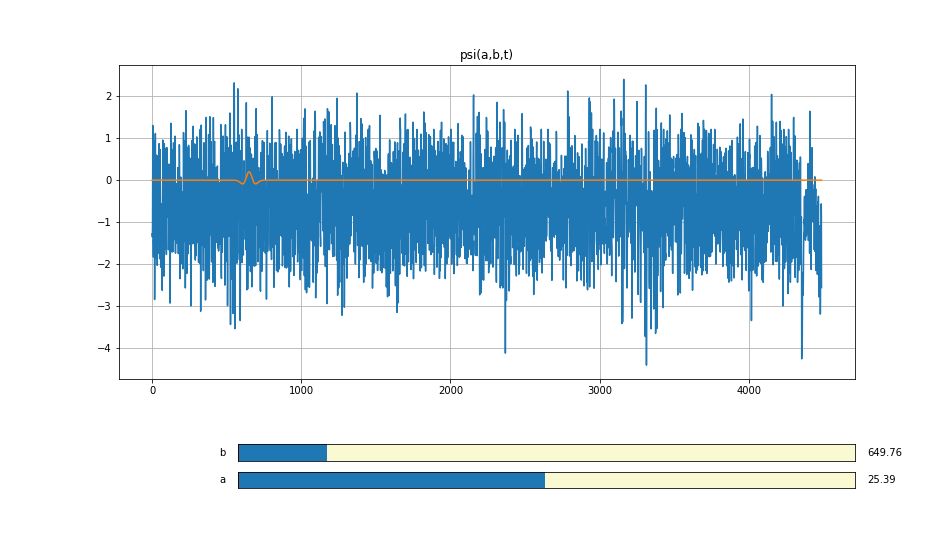

In [13]:
%matplotlib notebook
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.3)
plt.grid(True)
plt.title("psi(a,b,t)")
fig.canvas.set_window_title('Wavelets')

a0 = 1
b0 = 0
delta_a = 1
delta_b = 1
plt.plot(time, s(time))
l, = plt.plot(time, psi_base(1, 0, time))


axcolor = 'lightgoldenrodyellow'
axa = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axb = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sa = Slider(axa, 'a', 1, 50.0, valinit=a0)
sb = Slider(axb, 'b', 0, len(signal)-1, valinit=b0)


def update(x):
    a = sa.val
    b = sb.val
    l.set_ydata(psi_base(a, b, time))
    fig.canvas.draw_idle()
sa.on_changed(update)
sb.on_changed(update)



plt.show()

In [14]:

w = zeros((40, 70))

for a in range(1,40):
    for b in range(0,70):
        for t in range(0, len(signal)):
            temp = signal[t] * psi_base(a,b,t)
            w[int(a)][int(b)] += temp


In [15]:
w

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.89039409, -1.72363823, -1.15789937, ..., -1.65490439,
        -0.80454943, -0.06364945],
       [-2.0707619 , -2.27849631, -0.54467311, ..., -2.36282393,
        -1.50023125,  0.69201941],
       ...,
       [ 0.15757022,  0.02911415, -0.10007135, ..., -2.53878206,
        -2.45139714, -2.36192058],
       [ 0.13146045,  0.0027447 , -0.12670244, ..., -2.62557818,
        -2.53896498, -2.4502401 ],
       [ 0.10291263, -0.02593385, -0.15549786, ..., -2.71037356,
        -2.62475237, -2.53698894]])

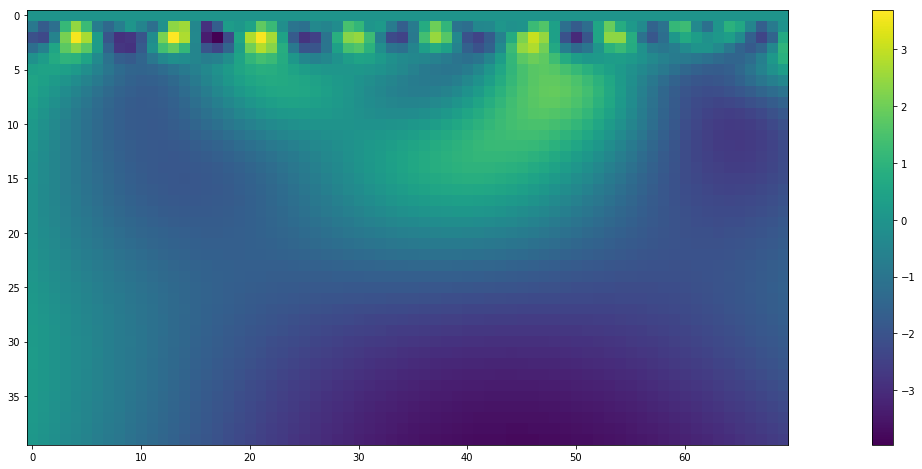

In [16]:
%matplotlib inline
fig = plt.figure(figsize=(30,8))
plt.imshow(w, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

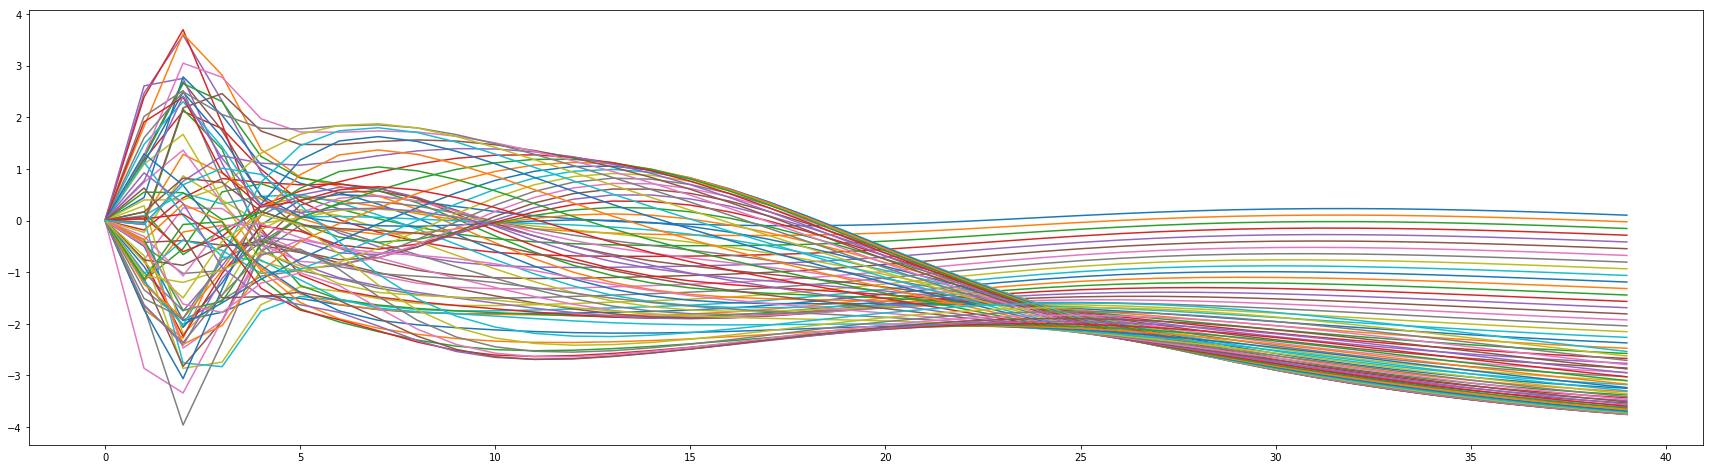

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(30,8))

plt.plot(w)
plt.show()